## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import xgboost as xgb
import matplotlib.pyplot as plt

## Read data and take a look

Let's start by looking at what columns we have, what their data types are and how many null-values there are.

In [2]:
df = pd.read_csv(
    './Data/output_SURF.csv',
    sep='\t'
)

df.drop_duplicates(inplace=True, ignore_index=True)
df.info()

/tmp/ipykernel_102404/1094095778.py:1: DtypeWarning: Columns (7,8,10,20,27,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1585585 entries, 0 to 1585584
Data columns (total 87 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   PredictionSurfNormalized       40088 non-null    object 
 1   PredictionToolNormalized       854287 non-null   object 
 2   FacultyName                    0 non-null        float64
 3   CourseName                     1585585 non-null  object 
 4   PredictionSurf                 40088 non-null    object 
 5   PredictionInstitution          7309 non-null     object 
 6   PredictionRemark               30659 non-null    object 
 7   CorrectDoi                     69 non-null       object 
 8   CorrectISBN                    62 non-null       object 
 9   Level2                         1585585 non-null  object 
 10  Level3                         811897 non-null   object 
 11  Level4                         0 non-null        float64
 12  CourseId      

In [3]:
len(df.loc[df["PredictionInstitution"].notna()])

7309

In [4]:
df.head()

,PredictionSurfNormalized,PredictionToolNormalized,FacultyName,CourseName,PredictionSurf,PredictionInstitution,PredictionRemark,CorrectDoi,CorrectISBN,Level2,...,Contains_sciencemag,Pagecount_bigger_50,BookAndWords10000,Contains_published_in,Contains_researchgate,Contains_to_appear_in,IsJournalWords8000,images_same_pagecount,Publisher_from_crossref,Contains_recommended_citation
0,NaN,NaN,NaN,Metabolic Consequences of Chronic Diseases wit...,NaN,NaN,NaN,NaN,NaN,Human Nutrition and Health,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Eigen Materiaal,NaN,Disease Ecology,NaN,NaN,NaN,NaN,NaN,Wildlife Ecology and Conservation Group,...,False,False,False,False,False,False,False,False,False,False
2,NaN,NaN,NaN,Agrobiodiversity,NaN,NaN,NaN,NaN,NaN,Soil Biology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Management Skills in Theory & Practice,NaN,NaN,NaN,NaN,NaN,Education and Learning Sciences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Thesis Skills,NaN,NaN,NaN,NaN,NaN,Rural Sociology,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### The following columns contain only null values and will not be used:

<ul>
    <li> 'FacultyName'
    <li> 'Level4'
    <li> 'issn'
    <li> 'usedpages'
    <li> 'openaccesscolor'
    <li> 'filepath'
    <li> 'runidentifier'
    <li> '_10_pics_page'
</ul>


In [5]:
# for col in df.columns:
#     if df[col].isna().all():
#         print(col)
df.dropna(axis=1, how="all", inplace=True)

#### The following columns concern the predictions and will not be used as input:

<ul>
    <li> 'PredictionSurf'
    <li> 'PredictionInstitution' (ground truth)
    <li> 'PredictionRemark'
    <li> 'prediction'
</ul>

The column 'PredictionInstitution' will be used as label, therefore all rows where this column has a null-value will be dropped. The 'prediction' column will be used later to compute the performance of the tool. The other columns will be dropped completely.

In [6]:
# df.drop(['PredictionSurf', 'prediction', 'PredictionRemark', 'PredictionSurfNormalized', 'PredictionToolNormalized'], axis="columns", inplace=True)
df.drop(['PredictionSurf', 'PredictionRemark', 'PredictionSurfNormalized', 'PredictionToolNormalized'], axis="columns", inplace=True)
df.dropna(subset=['PredictionInstitution'], inplace=True)

#### The following columns will not be used:

<ul>
    <li> 'CourseName'
    <li> 'CorrectDoi'
    <li> 'CorrectISBN'
    <li> 'Level2'
    <li> 'Level3'
    <li> 'CourseId'
    <li> 'AnalyseError'
    <li> 'CorrectAnalyseSurf'
    <li> 'CorrectAnalyseInstitution'
    <li> 'AnalyseISBN'
    <li> 'AnalyseDOI'
    <li> 'id'
    <li> 'uuid'
    <li> 'url'
    <li> 'filesource'
    <li> 'filestatus'
    <li> 'filename'
    <li> 'filehash'
    <li> 'filedate'
    <li> 'filetype'
    <li> 'lastmodifieddate'
    <li> 'creator'
    <li> 'filescanresults'
    <li> 'doi'
    <li> 'isbn'
    <li> 'author'
    <li> 'title'
    <li> 'publisher'
    <li> 'publicationyear'
    <li> 'sourcepagecount'
    <li> 'sourcewordcount'
    <li> 'oclcnumber'
    <li> 'openaccesslink'
</ul>

In [7]:
skipped_cols = ['CourseName', 'CorrectDoi', 'CorrectISBN', 
'Level2', 'Level3', 'CourseId', 'AnalyseError', 'CorrectAnalyseSurf', 
'CorrectAnalyseInstitution', 'AnalyseISBN', 'AnalyseDOI', 'id', 
'uuid', 'url', 'filesource', 'filestatus', 'filename', 'filehash', 
'filedate', 'filetype', 'lastmodifieddate', 'creator', 'filescanresults', 'doi', 'isbn', 
'author', 'title', 'publisher', 'publicationyear', 'sourcepagecount', 
'sourcewordcount', 'oclcnumber', 'openaccesslink']

df.drop(skipped_cols, axis="columns", inplace=True)


## Let's take another look at our columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7309 entries, 386 to 1585415
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   PredictionInstitution          7309 non-null   object
 1   CalculatedReliability          7309 non-null   int64 
 2   filemimetype                   7309 non-null   object
 3   isfilepublished                7309 non-null   bool  
 4   wordcount                      7309 non-null   int64 
 5   pagecount                      7309 non-null   int64 
 6   incollection                   7309 non-null   bool  
 7   userexcludedforscan            7309 non-null   bool  
 8   usedmultiplesources            7309 non-null   bool  
 9   isopenaccesstitle              7309 non-null   bool  
 10  picturecount                   7309 non-null   int64 
 11  prediction                     7309 non-null   object
 12  reliability                    7309 non-null   int64 
 13

#### Let's take a separate look at columns with dtype object (or bool)

In [9]:
object_cols = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype == 'bool']
len(object_cols)

37

The code below creates a profiling report before we change the boolean feature, here we can see that False is the domininant class.

In [11]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df.reset_index(drop=True), title="Pandas Profiling Report")
# profile.to_file("pandas_report_bools_unchanged.html")

Most columns with dtype object contain boolean values. We will change these to 0s and 1s and change their dtype to int. We also fill in the null values with 0s, so that we don't have to drop those datapoints. As shown with the profiling report above, False is the dominant class, which is the reason we change null values to 0 rather than 1.

In [75]:
for col in object_cols:
    if set(df[col].dropna().unique()) == {False, True}:
        df.loc[df[col] == True, col] = 1
        df.loc[df[col] == False, col] = 0
        df[col] = df[col].fillna(0)
        df[col] = df[col].astype("int")
    elif len(set(df[col].dropna().unique())) == 1:
        df.drop(col, axis=1, inplace=True)

## Make a profiling report

Uncomment and run this cell to get a pandas profiling report. This will show nicely which features are correlated, amongst other things.

In [76]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df.reset_index(drop=True), title="Pandas Profiling Report")
# profile.to_file("pandas_report.html")

## Drop duplicates

Making changes to the data, particularly dropping columns, has introduced duplicate rows. These need to be dropped to prevent a bias when training our model. This leaves us with 766 unique datapoints, that each have 26 features and a label.

The large number of duplicates is partially caused by the fact for many documents the wordcount is 0. For these documents the actual wordcount is unknown.

In [77]:
(df["wordcount"] == 0).sum()

6482

In [78]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   PredictionInstitution  766 non-null    object
 1   CalculatedReliability  766 non-null    int64 
 2   isfilepublished        766 non-null    int64 
 3   wordcount              766 non-null    int64 
 4   pagecount              766 non-null    int64 
 5   isopenaccesstitle      766 non-null    int64 
 6   picturecount           766 non-null    int64 
 7   prediction             766 non-null    object
 8   reliability            766 non-null    int64 
 9   DOI_in_OA              766 non-null    int64 
 10  DOI_no_PPT             766 non-null    int64 
 11  PPT_in_name            766 non-null    int64 
 12  ppt_creator            766 non-null    int64 
 13  wordcount_o            766 non-null    int64 
 14  Contains_DOI           766 non-null    int64 
 15  Contains_ISBN          

## Labels' support

Let's take a look at the support of each label, i.e., how often does each label occur in the dataset.

In [80]:
len(df)

766

In [81]:
labels = df["PredictionInstitution"]
unique_labels = labels.unique()

for label in unique_labels:
    print('{:<32}  {:>3}'.format(label, (labels == label).sum()))

eigen materiaal - titelindicatie  332
korte overname                    232
middellange overname               55
lange overname                     25
mogelijk licentie                   1
open access                        14
eigen materiaal - powerpoint       92
overname met licentie               1
eigen materiaal -overig             2
eigen materiaal - overig           12


#### Aggregate and drop

Some of these labels can be aggregated. Some others simpy do not have enough samples and will be dropped. This leaves us with 6 classes that have 14 - 346 samples.

In [82]:
df.loc[df["PredictionInstitution"] == "eigen materiaal -overig", "PredictionInstitution"] = "eigen materiaal - overig"
df.loc[df["PredictionInstitution"] == "eigen materiaal - titelindicatie", "PredictionInstitution"] = "eigen materiaal - overig"

In [83]:
df = df[df.PredictionInstitution != "mogelijk licentie"]
df = df[df.PredictionInstitution != "overname met licentie"]


labels = df["PredictionInstitution"]
unique_labels = labels.unique()

for label in unique_labels:
    print('{:<32}  {:>3}'.format(label, (labels == label).sum()))

eigen materiaal - overig          346
korte overname                    232
middellange overname               55
lange overname                     25
open access                        14
eigen materiaal - powerpoint       92


## Prepare data

Split the data frame into x and encoded y, which we transform to numpy arrays. 

In [84]:
x = df.drop(["PredictionInstitution", "prediction"], axis="columns").to_numpy()

In [85]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["PredictionInstitution"])

Create a simple train/test split and a stratified K-folds cross-validator, making 5 datasplits that each preserve the percentage of samples per class.

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [88]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## XGBoost model

There are many features with high correlation. XGBoost is not so sensitive to this. Another benefit of XGBoost is the ability to get feature importances quite easily.

#### Train using a simple data split

This makes is easy to use sklearn's classification report functionality, so we can very quickly evaluate how the model performs per class.

In [89]:
# xgb_model = xgb.XGBClassifier(max_depth=24)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_train, y_train)

predictions = xgb_model.predict(x_test)
report = classification_report(y_test, predictions, target_names=label_encoder.classes_, labels=np.unique(y_train))
print(report)

                              precision    recall  f1-score   support

    eigen materiaal - overig       0.96      0.98      0.97       106
eigen materiaal - powerpoint       0.92      0.89      0.91        27
              korte overname       1.00      0.96      0.98        75
              lange overname       0.83      1.00      0.91         5
        middellange overname       0.92      1.00      0.96        12
                 open access       0.80      0.80      0.80         5

                    accuracy                           0.96       230
                   macro avg       0.91      0.94      0.92       230
                weighted avg       0.96      0.96      0.96       230



#### Confusion matrix

Let's take a look at a more detailed confusion matrix.

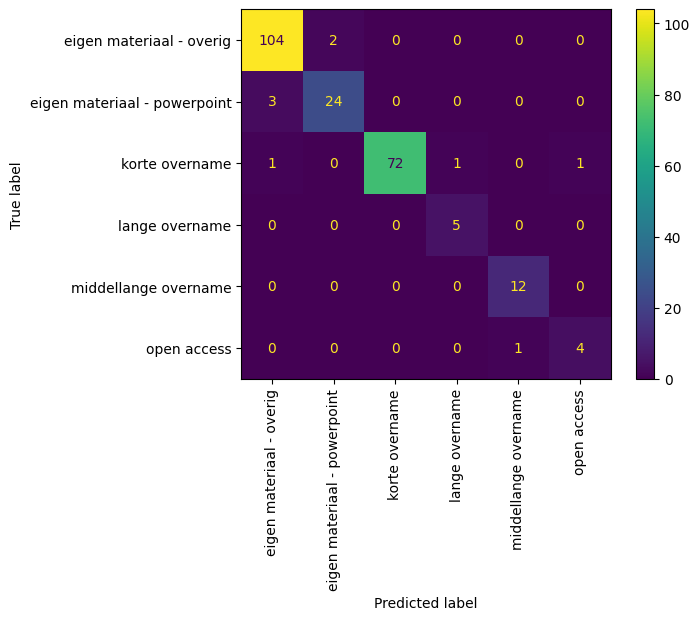

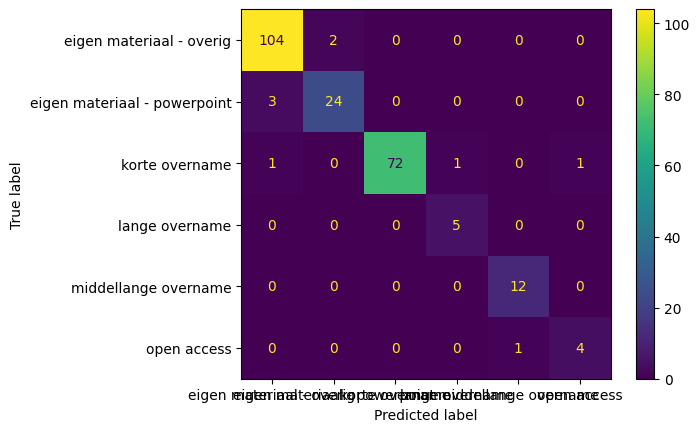

In [96]:
cm = confusion_matrix(y_test, predictions, labels=np.unique(y_train))
display = ConfusionMatrixDisplay.from_predictions(y_test, predictions, display_labels=label_encoder.classes_, xticks_rotation="vertical")
display.plot()
plt.show()

#### Train using K-fold

This gives us a more reliable accuracy and F1-score, as we eliminate the risk of testing on a particularly favorable or unfavorable test partition.

(It is also useful for hyperparameter optimization, should we choose to add that in later.)

In [26]:
accuracy_scores = 0.0
f1_scores = 0.0

for train_index, test_index in skf.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    xgb_model = xgb.XGBClassifier()
    xgb_model.fit(x_train, y_train)
    predictions = xgb_model.predict(x_test)
    accuracy_scores += accuracy_score(y_test, predictions)
    f1_scores += f1_score(y_test, predictions, average="macro")

print("Acc: ", accuracy_scores/5)
print("F1: ", f1_scores/5)

Acc:  0.9541279669762641
F1:  0.8733134565069441


#### Feature importances

In [63]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(x, y)

feature_names = df.drop("PredictionInstitution", axis="columns").columns.to_numpy()
feature_importance_scores = xgb_model.feature_importances_

top_five_indices = np.argpartition(feature_importance_scores, (-5, -1))[-5:]
top_five_scores = feature_importance_scores[top_five_indices][::-1]
top_five_names = feature_names[top_five_indices][::-1]

print("TOP FIVE\n---------------------------------")
for name, score in zip(top_five_names, top_five_scores):
    print('{:<18}  {:>3}'.format(name, score))


print("\n\n\nZERO SCORE\n---------------------------------")
zero_score_indices = np.argwhere(feature_importance_scores == 0).flatten()
zero_score_features = feature_names[zero_score_indices]

for feature in zero_score_features:
    print(feature)

TOP FIVE
---------------------------------
Words_more_300pp    0.39385610818862915
PPT_in_name         0.09514106065034866
pagecount           0.13232874870300293
isopenaccesstitle   0.09389233589172363
keyword_creator     0.08217126876115799



ZERO SCORE
---------------------------------
reliability
ppt_creator
wordcount_o
Contains_ISBN
_10Pagecount50
Contains_copyright
filename_indicator
Pagecount_bigger_50
BookAndWords10000


## Logistic regression

Since logistic regression is quite similar to what the current tool does, much more so than XGBoost, let's give that a try as well. In order to use logistic regression, we will have to standardize our data first.

This model also performs well, however (when using K-fold) it is not quite as good as XGBoost.

In [28]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

predictions = lr_model.predict(x_test)
report = classification_report(y_test, predictions, target_names=label_encoder.classes_, labels=np.unique(y_train))
print(report)

accuracy_scores = 0.0
f1_scores = 0.0

for train_index, test_index in skf.split(scaled_x, y):
    x_train, x_test = scaled_x[train_index], scaled_x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr_model = LogisticRegression()
    lr_model.fit(x_train, y_train)
    predictions = lr_model.predict(x_test)
    accuracy_scores += accuracy_score(y_test, predictions)
    f1_scores += f1_score(y_test, predictions, average="macro")

print("Acc: ", accuracy_scores/5)
print("F1: ", f1_scores/5)

                              precision    recall  f1-score   support

    eigen materiaal - overig       0.99      1.00      0.99        75
eigen materiaal - powerpoint       1.00      0.95      0.98        21
              korte overname       0.96      1.00      0.98        47
              lange overname       1.00      1.00      1.00         3
        middellange overname       1.00      0.67      0.80         6
                 open access       1.00      1.00      1.00         1

                    accuracy                           0.98       153
                   macro avg       0.99      0.94      0.96       153
                weighted avg       0.98      0.98      0.98       153

Acc:  0.9266597867217061
F1:  0.8465778961543876


## Current tool results for comparison

Let's take a look at the results of the current tool, so that we can compare it to the machine learning models above.

In [47]:
df.loc[df["prediction"] == "eigen materiaal - titelindicatie", "prediction"] = "eigen materiaal - overig"

In [48]:
tool_prediction = df["prediction"]
ground_truth = df["PredictionInstitution"]

accuracy = accuracy_score(ground_truth, tool_prediction)
f1 = f1_score(ground_truth, tool_prediction, average="macro")

print("Acc: ", accuracy)
print("F1: ", f1)

Acc:  0.31151832460732987
F1:  0.28818312521374384


For many datapoints the tool predicted "onbekend", meaning that it does not know how to classify those documents. If we leave out those datapoints, the performance is better.

In [51]:
df_no_onbekend = df.loc[df["prediction"] != "onbekend"]

tool_prediction = df_no_onbekend["prediction"]
ground_truth = df_no_onbekend["PredictionInstitution"]

accuracy = accuracy_score(ground_truth, tool_prediction)
f1 = f1_score(ground_truth, tool_prediction, average="macro")

print("Acc: ", accuracy)
print("F1: ", f1)

Acc:  0.5063829787234042
F1:  0.37438304052612836
